In [1]:
import pandas as pd 
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [80]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import warnings 
warnings.filterwarnings('ignore')

<h2>Part I: Prepare the dataset for training</h2>

<h3>1. Choose the dataset.</h3>

<h4>We pick Apple stock price as our dataset.</h4>

In [84]:
data = pd.read_csv('AAPL.csv')

In [4]:
print(data.head(5))
print(data.tail(5))

         Date      Open      High       Low     Close  Adj Close     Volume
0  2000-07-17  4.160714  4.200893  4.080357  4.165179   3.605784   65000600
1  2000-07-18  4.178571  4.205357  4.062500  4.089286   3.540084   79601200
2  2000-07-19  3.941964  4.058036  3.696429  3.763393   3.257959  114468200
3  2000-07-20  3.928571  4.075893  3.866071  3.937500   3.408683  116393200
4  2000-07-21  3.882813  3.973214  3.781250  3.825893   3.312065   49058800
            Date        Open        High         Low       Close   Adj Close  \
5025  2020-07-08  376.720001  381.500000  376.359985  381.369995  381.369995   
5026  2020-07-09  385.049988  385.269989  378.690002  383.010010  383.010010   
5027  2020-07-10  381.339996  383.920013  378.820007  383.679993  383.679993   
5028  2020-07-13  389.059998  399.820007  381.029999  381.910004  381.910004   
5029  2020-07-14  379.359985  389.019989  375.510010  388.230011  388.230011   

        Volume  
5025  29273000  
5026  31410700  
5027  225643

<h4>It shows that the dataset has more than 5k entries, which meets the requirments.</4>

<h4>The following picture shows the trend of Apple Stock Closing Price.</h4>

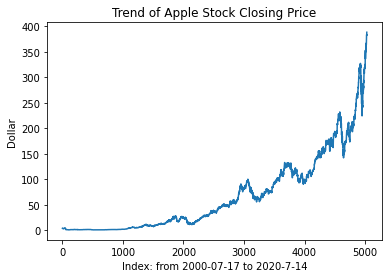

In [5]:
data['Close'].plot(label = 'Apple Stock Closing Price')
plt.title('Trend of Apple Stock Closing Price')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Dollar")
plt.show()

<h4>Remove all the entries with empty features and the result turns out perfect.</h4>

In [6]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5025,False,False,False,False,False,False,False
5026,False,False,False,False,False,False,False
5027,False,False,False,False,False,False,False
5028,False,False,False,False,False,False,False


<h3>2. Extract and describe the main statistics about the dataset and provide visual
representation of the dataset.</h3>

<h4><strong>Autocorrelation</strong> is a mathematical representation of the degree of <strong>similarity</strong> between a given time series and a lagged version of itself over successive time intervals. We are going to use Autocorrelation to describe the feature that we have interest in.</h4> 

<h4>The basic statistic of the dataset is shown below.</h4>

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,67.555547,68.243868,66.883020,67.591921,63.601912,1.132274e+08
std,75.516976,76.339475,74.826837,75.636857,74.518081,9.910500e+07
min,0.927857,0.942143,0.908571,0.937143,0.811282,9.835000e+06
25%,6.227857,6.301786,6.128929,6.235357,5.397932,4.490942e+07
50%,37.045000,37.381428,36.559284,36.985000,32.017819,8.462025e+07
75%,108.527499,109.315001,107.232498,108.367503,100.734135,1.505905e+08
max,389.059998,399.820007,381.029999,388.230011,388.230011,1.855410e+09


<h4>The trends of all features of Apple stock are shown below.</h4>

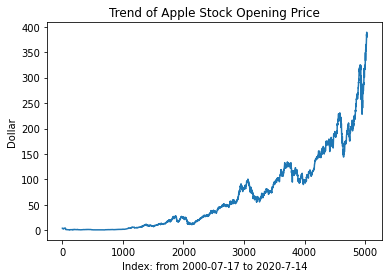

In [8]:
data['Open'].plot(label = 'Apple Stock Opening Price')
plt.title('Trend of Apple Stock Opening Price')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Dollar")
plt.show()

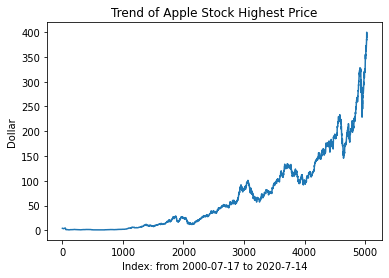

In [9]:
data['High'].plot(label = 'The highest price of the day')
plt.title('Trend of Apple Stock Highest Price')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Dollar")
plt.show()

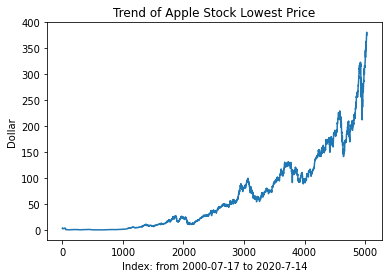

In [10]:
data['Low'].plot(label = 'The lowest price of the day')
plt.title('Trend of Apple Stock Lowest Price')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Dollar")
plt.show()

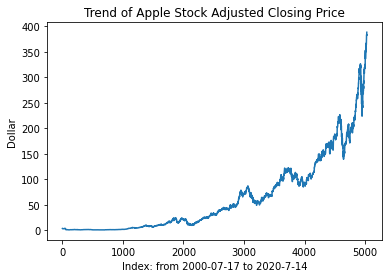

In [11]:
data['Adj Close'].plot(label = 'The adjusted closing price of the day')
plt.title('Trend of Apple Stock Adjusted Closing Price')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Dollar")
plt.show()

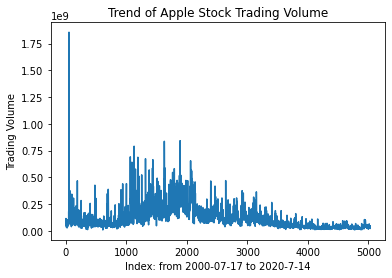

In [12]:
data['Volume'].plot(label = 'stock-trading volume')
plt.title('Trend of Apple Stock Trading Volume')
plt.xlabel("Index: from 2000-07-17 to 2020-7-14")
plt.ylabel("Trading Volume")
plt.show()

<h4>The plots above shows that the Apple stock price goes up steadily in recent years while the trading volumn goes down.</h4>

<h4>The followin plots are <strong>Autocorrelation</strong> of the <strong>closing price</strong> of APPLE stock.</h4>

Text(0.5, 1.0, 'Apple Autocorrelation plot')

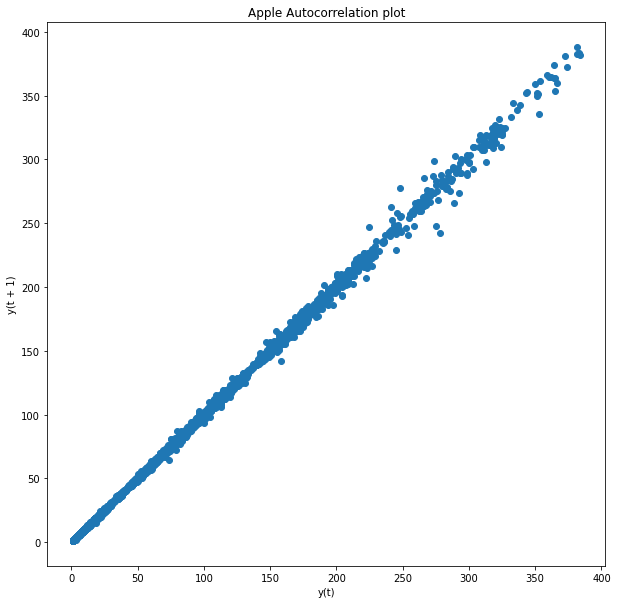

In [13]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=1)
plt.title('Apple Autocorrelation plot')

<h4> We can analyze the auto-correlation graph from the following perspective.<br/><br/>
<strong>Model suitability</strong><br/>
    The shape of the Autocorrelation graph can provide clues about the underlying structure of the data. A linear shape to the plot suggests that an <strong>autoregressive</strong> model is probably a better choice.
    <br/><br/>
<strong>Outliers</strong> (data points with extremely high or low values).<br/>
    We notice very few outliers in this graph. It is reasonable because oulier means the stock price changes significantly over one night, which hardly happens to big, established companies.
    <br/><br/>
<strong>Randomness</strong> (data without a pattern).<br/>
    Random data will spread fairly evenly both horizontally and vertically. The Apple stock price is clearly not random.
    <br/><br/>
<strong>Serial correlation</strong> (where error terms in a time series transfer from one period to another).<br/>
    If the data shows a linear pattern, it suggests autocorrelation is present. A positive linear trend suggests a positive autocorrelation; a negative linear trend suggests a negative autocorrelation. The tighter the data is clustered around the diagonal, the more autocorrelation is present; perfectly autocorrelated data will cluster in a single diagonal line. We can see our data s perfectly autocorrelated.
    <br/><br/>
<strong>Seasonality</strong> (periodic fluctuations in time series data that happens at regular periods).<br/>
     Data with seasonality will repeat itself periodically in a sine or cosine-like wave. Our data is not seasonal for sure.
</h4>

Text(0.5, 1.0, 'Apple Autocorrelation plot')

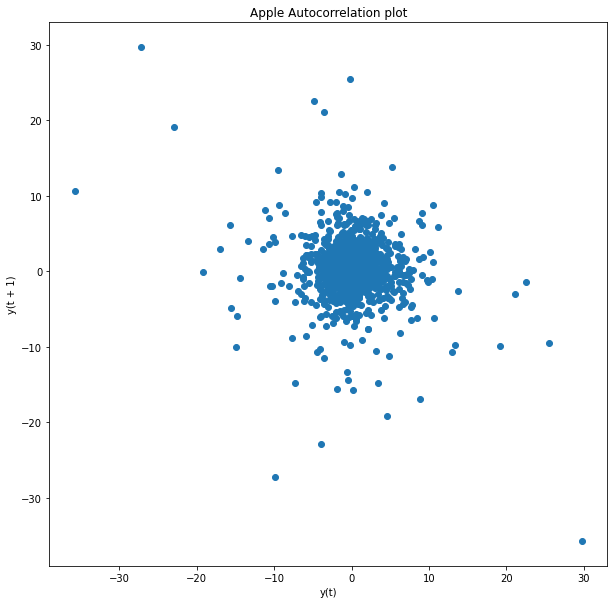

In [14]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot((data['Close']-data['Close'].shift(1)), lag=1)
plt.title('Apple Autocorrelation plot')

<h4>The picture above is actually the lag plot of the lag plot. It shows the autocorrelation of the autocorrelation. We can notice there is roughly a round which centers in (0, 0). It indicates that the stock price change steadily, namely the change of stock price change is small.</h4>

<h4>We can aslo employ <strong>Auto-correlation function</strong> and  <strong>Partial Auto-correlation function</strong> to descibe the data, which are shown below.</h4>

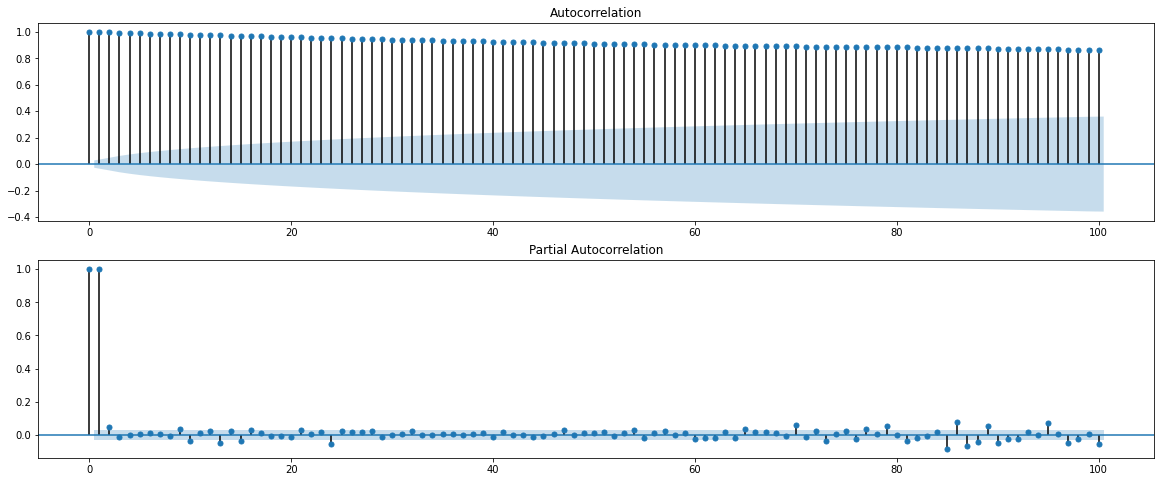

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Close'].iloc[13:],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:],lags=100,ax=ax2)

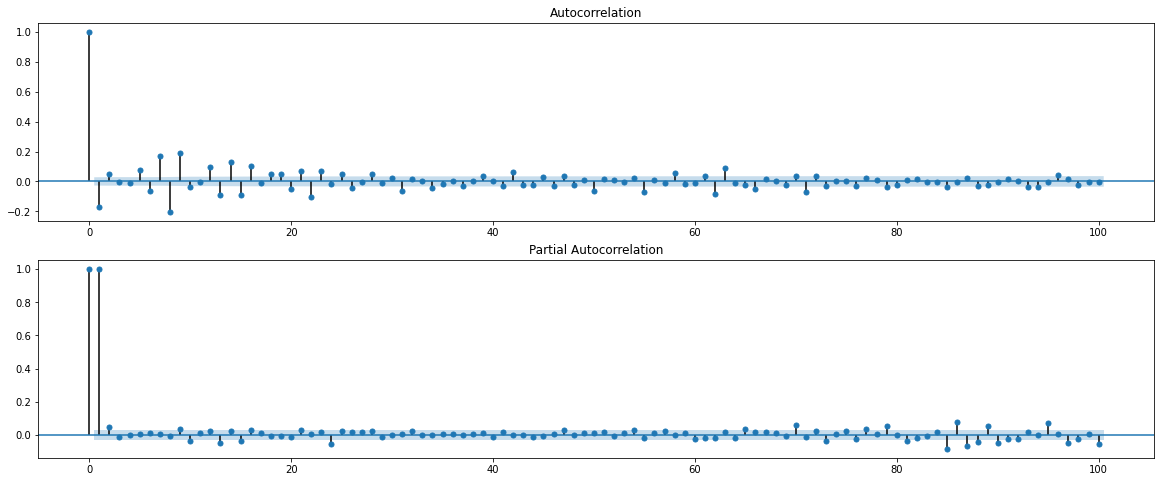

In [16]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf((data['Close']-data['Close'].shift(1)).iloc[13:],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:],lags=100,ax=ax2)

<h3>3. Preprocess the dataset for training (e.g. cleaning and filling the missing variables,
split between training/testing/validation).</h3>

<h4>We only need to split the dataset since the cleaning has already been finished.</h4>

In [17]:
train_data,test_data = data[0:int(len(data)*0.8)],data[int(len(data)*0.8):]

<h4>The following picture shows how the training and testing data look like.</h4>

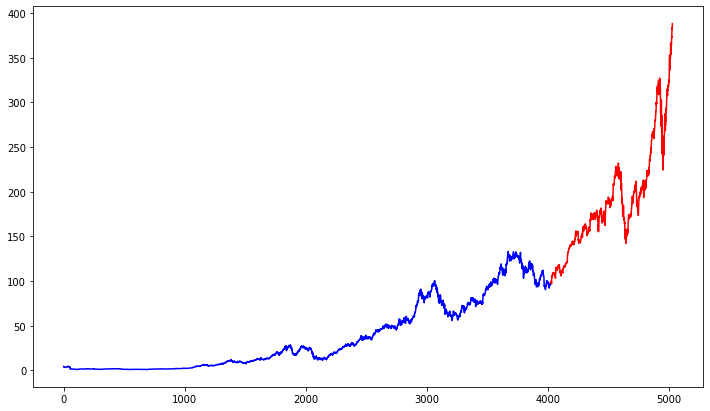

In [18]:
plt.figure(figsize=(12,7))
plt.plot(train_data['Close'],'blue',label='Training Data')
plt.plot(test_data['Close'],'red',label='Testing Data')

In [19]:
print(train_data.shape)

(4024, 7)


</br>
</br>

<h2>Part II: Classical time series forecasting methods</h2>

<h3>1. Choose the features and targets in the dataset.</h3>

<h4>We pick the <strong>closing price</strong> of Apple stock as the feature to analyze.</h4>

<br/>

<h3>2. Apply statistical algorithms (min 3 algorithms) to forecast the values. Possible
algorithms include: ARIMA, VAR, SARIMAX, etc.</h3>

<h4>We pick <strong>ARIMA</strong>, <strong>SARIMAX</strong>, and <strong>Moving Average</strong> as our algorithms. And use MSE to measure the performance of our algorithms.<br/>The first one we tested was <strong>ARIMA.</h4>

In [20]:
from statsmodels.tsa.arima_model import ARIMA

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


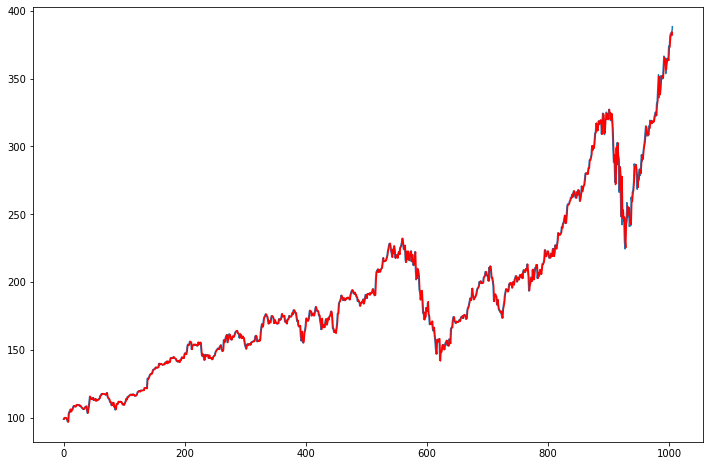

In [21]:
plt.figure(figsize=(12,8))
plt.plot(test_ar)
plt.plot(predictions, color='red')

In [22]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 17.190


In [23]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5028
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10562.951
Method:                       css-mle   S.D. of innovations              1.978
Date:                Tue, 21 Jul 2020   AIC                          21139.901
Time:                        18:04:49   BIC                          21185.561
Sample:                             1   HQIC                         21155.900
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.026      2.892      0.004       0.024       0.126
ar.L1.D.y     -0.1694      0.014    -12.044      0.000      -0.197      -0.142
ar.L2.D.y      0.0208      0.014      1.458      0.1

<h4>The second one we tested was <strong>SARIMA</strong>.</h4>

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


<function matplotlib.pyplot.show(*args, **kw)>

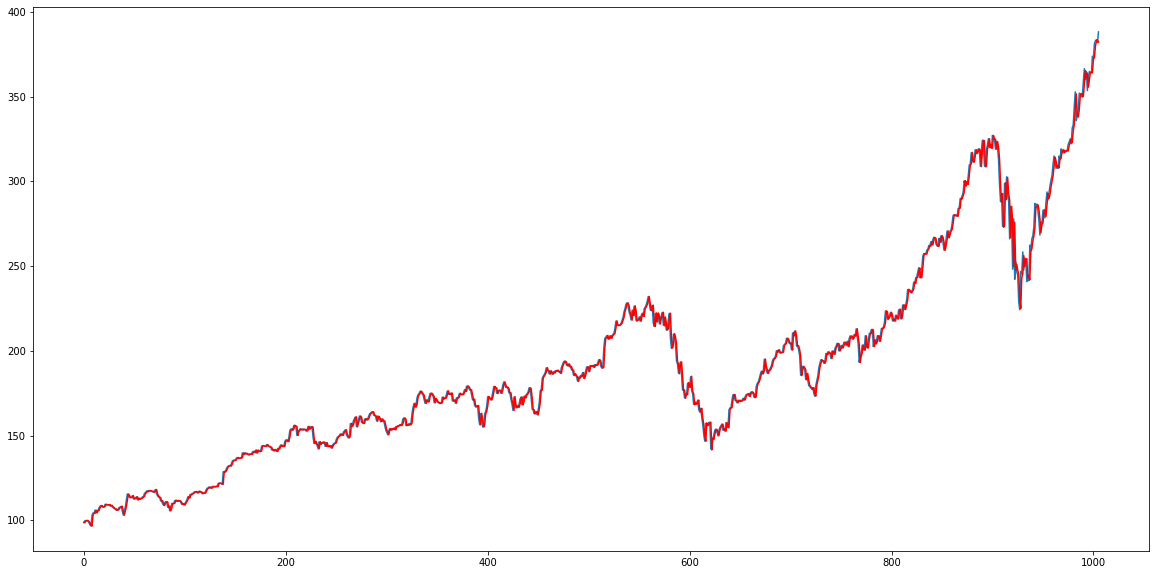

In [25]:
plt.figure(figsize=(20,10))
plt.plot(test_ar)
plt.plot(predictions,color='red')
plt.show

In [26]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_ar,predictions)
print('MSE is:',error)

MSE is: 16.796089220972213


In [27]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5029
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10582.216
Date:                Tue, 21 Jul 2020   AIC                          21170.433
Time:                        18:08:37   BIC                          21190.001
Sample:                             0   HQIC                         21177.289
                               - 5029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2798      0.016    -17.064      0.000      -0.312      -0.248
ma.L1          0.1109      0.018      6.273      0.000       0.076       0.146
sigma2         3.9410      0.017    231.043      0.0

<h4>The last one we tested was <strong>Moving Average</strong>.</h4>

In [28]:
data_ar = data['Close'].values

In [29]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [30]:
data_ar_stationary = difference(data_ar,1)
train_data,test_data = data_ar_stationary[0:int(len(data)*0.8)],data_ar_stationary[int(len(data)*0.8):]

In [31]:
train_ar = train_data.values
test_ar = test_data.values

<h4>Note that if we set <strong>p</strong> and <strong>q</strong> to certain value to get <strong>Moving Average</strong> from <strong>ARMA</strong>.</h4>

In [32]:
from statsmodels.tsa.arima_model import ARMA

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
        model = ARMA(history, order=(0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        yhat = inverse_difference(data_ar, yhat, len(test_data)+1-t)
        predictions.append(yhat)
        obs = test_ar[t]
        history.append(obs)


<class 'list'>


<function matplotlib.pyplot.show(*args, **kw)>

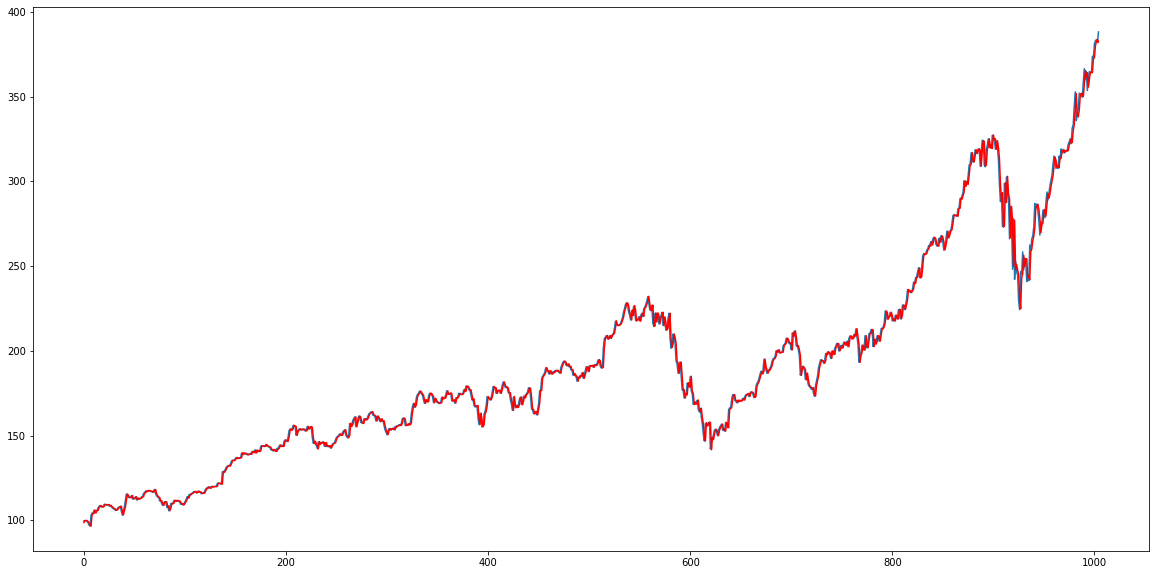

In [33]:
plt.figure(figsize=(20,10))
plt.plot(data_ar[int(len(data)*0.8)+1:])
plt.plot(predictions,color='red')
plt.show

In [34]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(data_ar[int(len(data)*0.8)+1:],predictions)
print('MSE is:',error)

MSE is: 16.870187692197106


In [35]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5028
Model:                     ARMA(0, 2)   Log Likelihood              -10577.572
Method:                       css-mle   S.D. of innovations              1.983
Date:                Tue, 21 Jul 2020   AIC                          21163.144
Time:                        18:09:09   BIC                          21189.236
Sample:                             0   HQIC                         21172.286
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.025      3.064      0.002       0.027       0.123
ma.L1.y       -0.1698      0.014    -12.062      0.000      -0.197      -0.142
ma.L2.y        0.0469      0.014      3.407      0.0

<h3>3. Provide the comparison of the results of different statistical models you have
used. This can be in the form of graph representation and your reasoning about
the results.</h3>

<h4>The graphs above shows that all the three models can forecast the trending well. We have to further measure them with <strong>MSE</strong>.</h4> 
<h4> We get:<br/>
<br/>
    <strong>ARIMA:</strong>17.190 <br/><br/>
    <strong>SARIMA:</strong>16.796 <br/><br/>
    <strong>MA:</strong>16.870 <br/><br/>
    It shows that SARIMA outperformed ARIMA. This does not surprise me because the seasonal ARIMA model (SARIMA) is formed by including additional seasonal terms in the ARIMA models. It is written as follows:<br/>
</h4>

![title](picture1.png)

<h4>Therefore SARIMA can capture the seaonal part of the dataset. However we already know that our dataset is not very seasonal. Picture below is the autocorrelation picture of our dataset:</h4>  

Text(0.5, 1.0, 'Apple Autocorrelation plot')

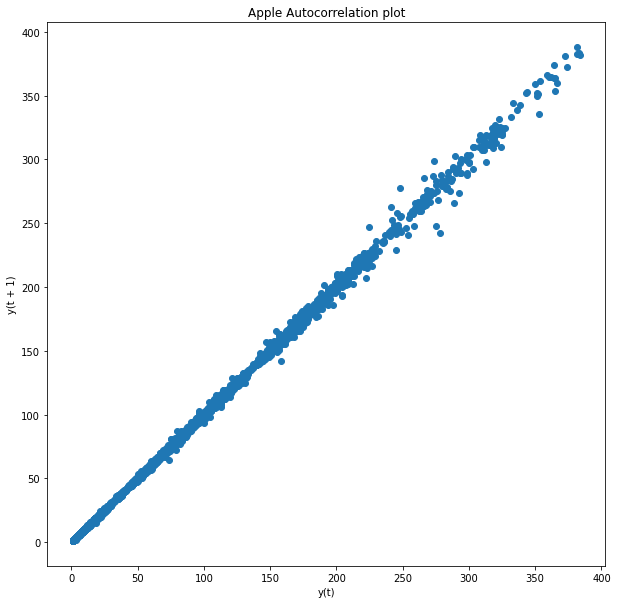

In [36]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=1)
plt.title('Apple Autocorrelation plot')

<h4>It looks very different from the classic seasonal data, like picture below, but it still may contain seasonality. For example, Apple may release new products at the same time each year, which has a seasonal effect on the stock price. <strong>SARIMA</strong> can take this into account and thus make a better forecast.</h4>

![title](picture2.png)

<h4>What really surprised me was that <strong>MA</strong> performed better than <strong>ARIMA</strong>. This is beyond common sense because many people believe the more sophisticated models can always forecast better. However it turns out a simple model can perform better sometimes. In fact some experts in this field, like George Athanosopoulos and Rob Hyndman, have mentioned that <strong>'Some forecasting methods are very simple and surprisingly effective.'</strong> We should not blindly tend to the complex models.</h4>

</br>
</br>

<h2>Part III: Deep learning time series forecasting methods</h2>

<h3>1. Apply MLP to predict the value. Show the results on 3 different MLP setups.</h3>

<h4>The pipe-line is very similar to professor's demo. I cite the source in the end of the script and add comments everywhere in this program.</h4>


<strong>Note:</strong> All the comments are written inside the code blocks.

### MLP - Predict whether the value will go up or down.

In [257]:
data2 = pd.read_csv('AAPL.csv')[::-1]
data3 = data2.copy()
data2 = data2.loc[:, 'Close'].tolist()

In [258]:
def shuffle_in_unison(a, b): # used to disrupt the data order.
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype) # creat empty np.adarray which has the same size with the training set.
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a)) # create a series of random values with no duplicates. Replace the original indexs with this random indexs. 
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index] # replacement.
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [259]:
def create_Xt_Yt(X, y, percentage=0.9):
    p = int(len(X) * percentage) # divide the data into training part(9/10) and testing part(1/10). P is the index where we split the dataset.
    X_train = X[0:p]
    Y_train = Y[0:p] # index 0~p go to training set.
    X_train, Y_train = shuffle_in_unison(X_train, Y_train) # send training data to disrupt the order so it totally becomes a supervised learning problem.
    X_test = X[p:] # index p~the last number go to testing set.
    Y_test = y[p:]
    return X_train, X_test, Y_train, Y_test

<h4>The following steps tranform the time series forecasting problem into a supervised learning problem (classification). It predicts the value will go up or down instead of forecasting a exact number.</h4>

In [260]:
WINDOW = 30 
# Use 30 data points (it will be normalized later) as the 'X' in the supervised learning. We use a range instead of a single data point because it contains
# more information about trend.
STEP = 1
# The stepsize of the window's movement.
FORECAST = 5
# Forecast the fifth coming data point.

In [261]:
X, Y = [], []
for i in range(0, len(data2), STEP):
    try:
        x_i = data2[i:i+WINDOW] # use a range of data points as 'X'.
        y_i = data2[i+WINDOW+FORECAST] # the value of the 5th coming data poit ahead of the right side of the window.
        last_close = x_i[WINDOW-1] # use the right side of the window to determine if the 5th coming value goes up or down.
        next_close = y_i
        if last_close < next_close: # value goes up.
            y_i = [1, 0]
        else: 
            y_i = [0, 1] # value goes down.
    except Exception as e:
        print(e)
        break
    X.append(x_i)
    Y.append(y_i)
X = [(np.array(x) - np.mean(x)) / np.std(x) for x in X] # (x-mean)/Standard deviation. This is actually normalization.
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y)

list index out of range


In [262]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4495, 30)
(500, 30)
(4495, 2)
(500, 2)


In [263]:
model = Sequential()
model.add(Dense(64, input_dim=30))#, kernel_initializer='uniform', bias_initializer='ones')) #zeros, ones, uniform
model.add(BatchNormalization())
model.add(LeakyReLU()) # use LeakyRELU as the activiation funtion of the hidden layer.
model.add(Dense(2)) # This is the output layer. It has 2 units because the output is [m, n]. Unit 1 outputs m and Unit 2 outputs n. And if we apply 1-hot encoding,
                    # the outcome will be exactly the [0, 1] or [1, 0] form. 
model.add(Activation('softmax')) # The output layer uses softmax as activition function. The outputs look like likelihood. 
optimizer = Adam() # use Adam() as optimizer to update the weight. 

In [264]:
model.layers[0].get_weights()

[array([[-0.24330969,  0.07734713, -0.11007091, ...,  0.23800692,
         -0.11065315,  0.03913867],
        [ 0.0393807 ,  0.18442237, -0.24979687, ...,  0.06111044,
          0.24471837,  0.05548137],
        [ 0.05729562, -0.15664771, -0.23695703, ..., -0.03719597,
          0.04986191, -0.07340568],
        ...,
        [-0.09885906, -0.01160562,  0.12331212, ...,  0.11789826,
          0.20706233, -0.20948282],
        [-0.19015774,  0.15509   ,  0.17195407, ..., -0.17931357,
         -0.15203878, -0.22642626],
        [ 0.11885831, -0.18206812, -0.03755865, ...,  0.02455828,
          0.20710069,  0.13061708]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [265]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1) # how to train the MLP.
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [266]:
history = model.fit(X_train, Y_train,
                   nb_epoch=150,
                   batch_size=128,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[reduce_lr])

Train on 4495 samples, validate on 500 samples
Epoch 1/150
4495/4495 [==============================] - 0s 51us/step - loss: 0.7310 - accuracy: 0.5339 - val_loss: 0.7483 - val_accuracy: 0.4900
Epoch 2/150
4495/4495 [==============================] - 0s 6us/step - loss: 0.6900 - accuracy: 0.5675 - val_loss: 0.7227 - val_accuracy: 0.4800
Epoch 3/150
4495/4495 [==============================] - 0s 7us/step - loss: 0.6822 - accuracy: 0.5713 - val_loss: 0.7354 - val_accuracy: 0.4920
Epoch 4/150
4495/4495 [==============================] - 0s 6us/step - loss: 0.6800 - accuracy: 0.5831 - val_loss: 0.7261 - val_accuracy: 0.4820
Epoch 5/150
4495/4495 [==============================] - 0s 6us/step - loss: 0.6778 - accuracy: 0.5833 - val_loss: 0.7310 - val_accuracy: 0.4820
Epoch 6/150
4495/4495 [==============================] - 0s 6us/step - loss: 0.6761 - accuracy: 0.5893 - val_loss: 0.7335 - val_accuracy: 0.4800
Epoch 7/150
4495/4495 [==============================] - 0s 6us/step - loss: 0.674

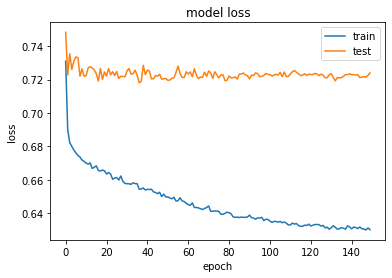

In [267]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

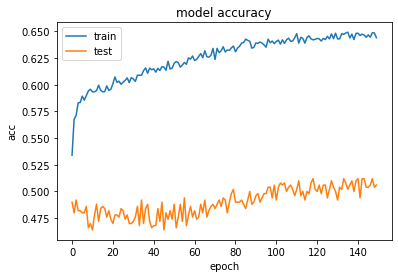

In [268]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

<h4>The following chart is Y_Prediction Vs Y_test. The X label is the index and Y label is <strong>n</strong> in [n, m]. Therefore it is either 1 or 0. I lift Y_test by 0.3 so you can compare them easily. If the prediction is correct you should see the nearest orange and blue line have the same structure. </h4>

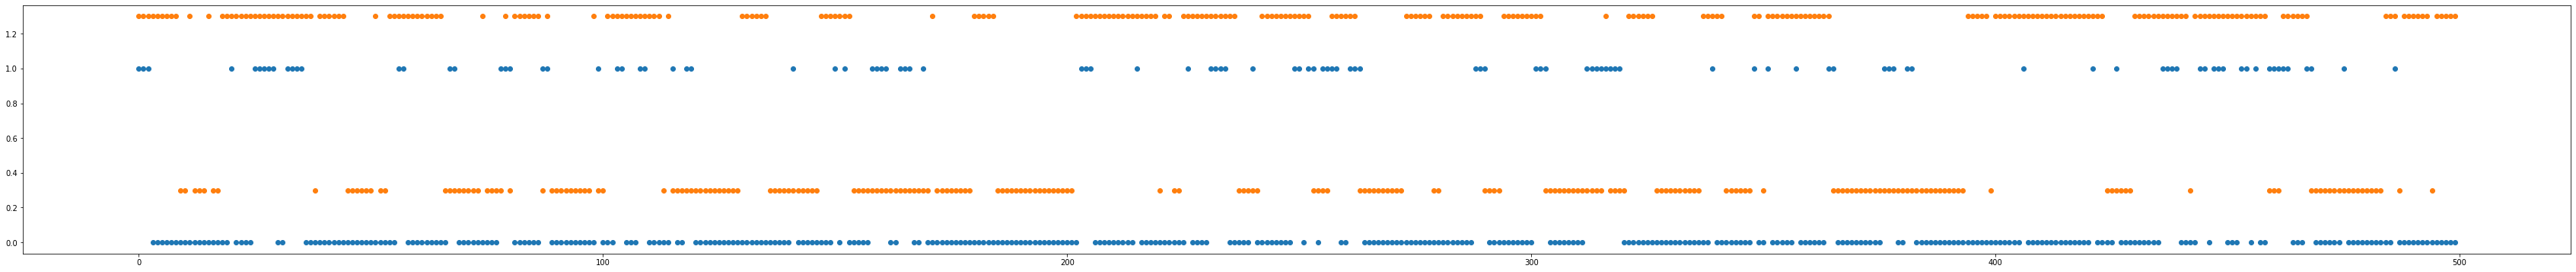

In [307]:
Y_pred = model.predict(X_test)

for j,i in enumerate(Y_pred):
    if i[0] > i[1]:
        Y_pred[j] = [1,0]
    else:
        Y_pred[j] = [0,1]

output = []
for j,i in enumerate(Y_pred):
    output.append(i[0])
output2 = []
for j,i in enumerate(Y_test):
    output2.append(i[0]+0.3)

stamp = np.arange(0, len(Y_pred), 1)
plt.figure(figsize=(60, 6))
plt.scatter(stamp, output)
plt.scatter(stamp, output2)

### And we add another hidden layer on top of the previous one and see what will happen.

In [308]:
model = Sequential()
model.add(Dense(64, input_dim=30))#, kernel_initializer='uniform', bias_initializer='ones')) #zeros, ones, uniform
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16)) # This time we add another hidden layer, which has 16 units.
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))

optimizer = Adam()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                   nb_epoch=150,
                   batch_size=128,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[reduce_lr])

Train on 4495 samples, validate on 500 samples
Epoch 1/150
4495/4495 [==============================] - 0s 67us/step - loss: 0.7652 - accuracy: 0.5773 - val_loss: 0.7341 - val_accuracy: 0.4580
Epoch 2/150
4495/4495 [==============================] - 0s 8us/step - loss: 0.6906 - accuracy: 0.5780 - val_loss: 0.7198 - val_accuracy: 0.4420
Epoch 3/150
4495/4495 [==============================] - 0s 8us/step - loss: 0.6762 - accuracy: 0.5851 - val_loss: 0.7181 - val_accuracy: 0.4660
Epoch 4/150
4495/4495 [==============================] - 0s 7us/step - loss: 0.6716 - accuracy: 0.5927 - val_loss: 0.7218 - val_accuracy: 0.4860
Epoch 5/150
4495/4495 [==============================] - 0s 7us/step - loss: 0.6688 - accuracy: 0.6002 - val_loss: 0.7269 - val_accuracy: 0.4520
Epoch 6/150
4495/4495 [==============================] - 0s 8us/step - loss: 0.6673 - accuracy: 0.6004 - val_loss: 0.7180 - val_accuracy: 0.4660
Epoch 7/150
4495/4495 [==============================] - 0s 7us/step - loss: 0.665

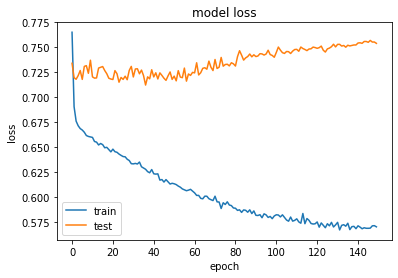

In [309]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

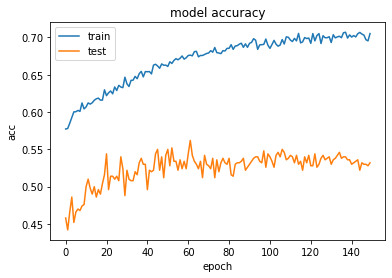

In [310]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

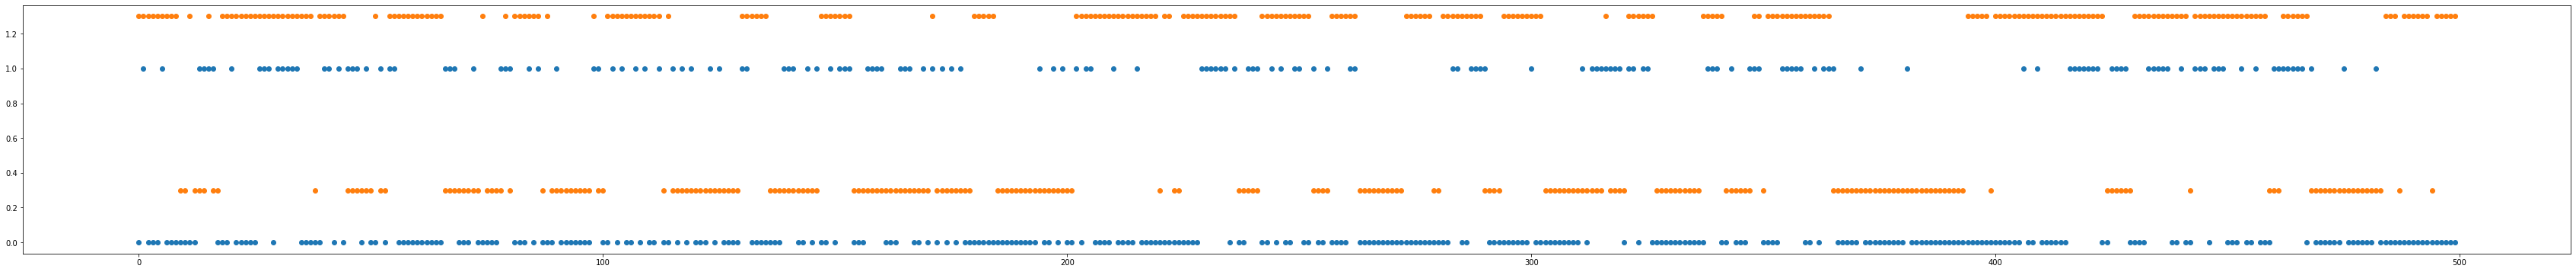

In [311]:
Y_pred = model.predict(X_test)

for j,i in enumerate(Y_pred):
    if i[0] > i[1]:
        Y_pred[j] = [1,0]
    else:
        Y_pred[j] = [0,1]

output = []
for j,i in enumerate(Y_pred):
    output.append(i[0])
output2 = []
for j,i in enumerate(Y_test):
    output2.append(i[0]+0.3)

stamp = np.arange(0, len(Y_pred), 1)
plt.figure(figsize=(60, 6))
plt.scatter(stamp, output)
plt.scatter(stamp, output2)

### This time we apply regulization to the layers and see what will happen.

In [312]:
from keras import regularizers

model = Sequential()
model.add(Dense(64, input_dim=30, activity_regularizer=regularizers.l2(0.01)))#, kernel_initializer='uniform', bias_initializer='ones')) #zeros, ones, uniform
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16, activity_regularizer=regularizers.l2(0.01))) # Add regulization to the hidden layers.
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))

optimizer = Adam()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                   nb_epoch=150,
                   batch_size=128,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[reduce_lr])

Train on 4495 samples, validate on 500 samples
Epoch 1/150
4495/4495 [==============================] - 0s 73us/step - loss: 45.8964 - accuracy: 0.5161 - val_loss: 25.5842 - val_accuracy: 0.5000
Epoch 2/150
4495/4495 [==============================] - 0s 8us/step - loss: 21.8562 - accuracy: 0.5215 - val_loss: 15.3494 - val_accuracy: 0.4800
Epoch 3/150
4495/4495 [==============================] - 0s 8us/step - loss: 13.9052 - accuracy: 0.5261 - val_loss: 11.0764 - val_accuracy: 0.4800
Epoch 4/150
4495/4495 [==============================] - 0s 8us/step - loss: 10.0094 - accuracy: 0.5335 - val_loss: 8.7523 - val_accuracy: 0.4640
Epoch 5/150
4495/4495 [==============================] - 0s 8us/step - loss: 7.7737 - accuracy: 0.5321 - val_loss: 7.2533 - val_accuracy: 0.4600
Epoch 6/150
4495/4495 [==============================] - 0s 8us/step - loss: 6.3338 - accuracy: 0.5457 - val_loss: 6.2128 - val_accuracy: 0.4660
Epoch 7/150
4495/4495 [==============================] - 0s 8us/step - loss

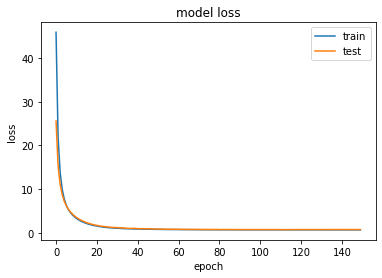

In [313]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

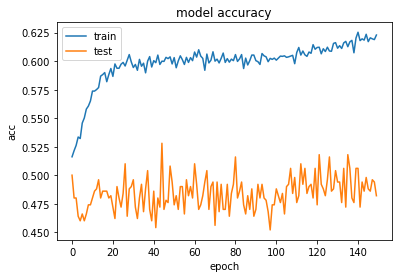

In [314]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

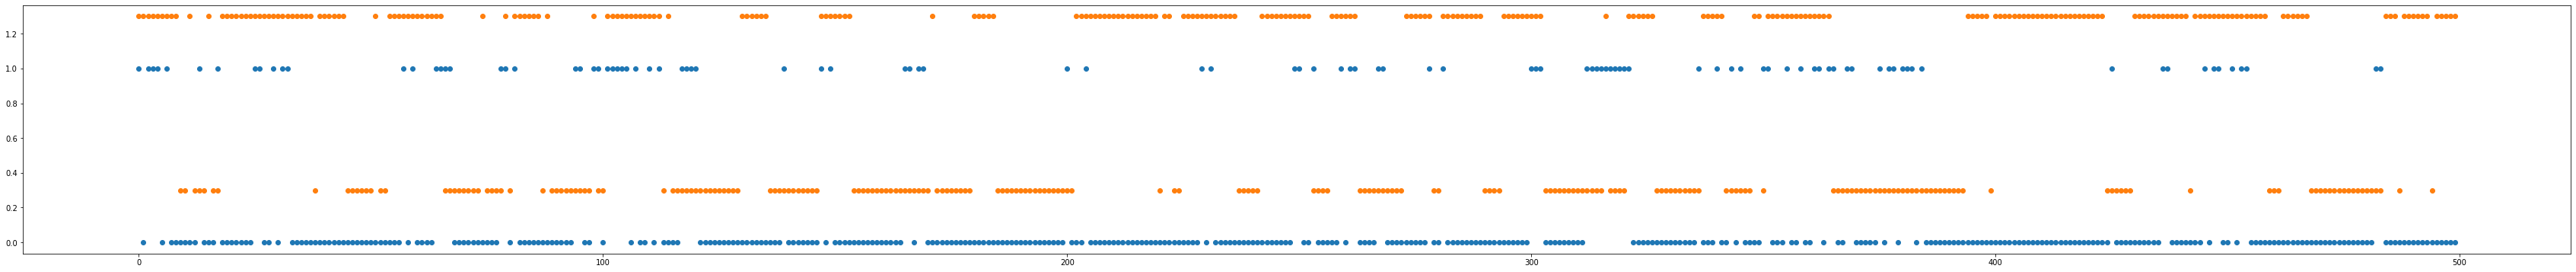

In [315]:
Y_pred = model.predict(X_test)

for j,i in enumerate(Y_pred):
    if i[0] > i[1]:
        Y_pred[j] = [1,0]
    else:
        Y_pred[j] = [0,1]

output = []
for j,i in enumerate(Y_pred):
    output.append(i[0])
output2 = []
for j,i in enumerate(Y_test):
    output2.append(i[0]+0.3)

stamp = np.arange(0, len(Y_pred), 1)
plt.figure(figsize=(60, 6))
plt.scatter(stamp, output)
plt.scatter(stamp, output2)

### And finally we add dropout to the MLP and see what will happen. Dropout means that we turn off some units.

In [316]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=30, activity_regularizer=regularizers.l2(0.01)))#, kernel_initializer='uniform', bias_initializer='ones')) #zeros, ones, uniform
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(16, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))

optimizer = Adam()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                   nb_epoch=150,
                   batch_size=128,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[reduce_lr])

Train on 4495 samples, validate on 500 samples
Epoch 1/150
4495/4495 [==============================] - 0s 84us/step - loss: 63.3486 - accuracy: 0.4883 - val_loss: 28.3313 - val_accuracy: 0.4680
Epoch 2/150
4495/4495 [==============================] - 0s 9us/step - loss: 35.1317 - accuracy: 0.5095 - val_loss: 17.6989 - val_accuracy: 0.4720
Epoch 3/150
4495/4495 [==============================] - 0s 9us/step - loss: 23.6104 - accuracy: 0.5266 - val_loss: 12.8100 - val_accuracy: 0.4740
Epoch 4/150
4495/4495 [==============================] - 0s 8us/step - loss: 17.1026 - accuracy: 0.5241 - val_loss: 10.0865 - val_accuracy: 0.4800
Epoch 5/150
4495/4495 [==============================] - 0s 8us/step - loss: 13.1431 - accuracy: 0.5333 - val_loss: 8.3719 - val_accuracy: 0.4660
Epoch 6/150
4495/4495 [==============================] - 0s 9us/step - loss: 10.4359 - accuracy: 0.5433 - val_loss: 7.1435 - val_accuracy: 0.4580
Epoch 7/150
4495/4495 [==============================] - 0s 9us/step - l

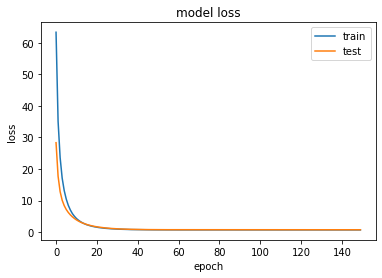

In [317]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

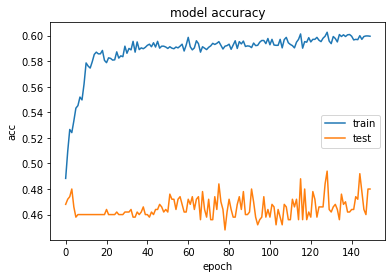

In [318]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

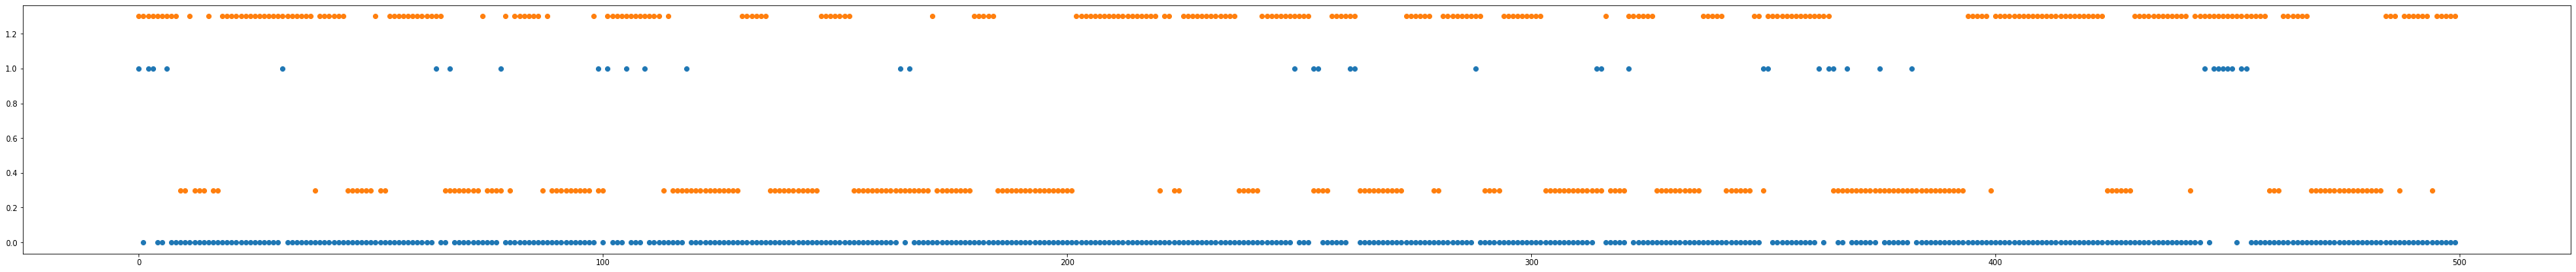

In [319]:
Y_pred = model.predict(X_test)

for j,i in enumerate(Y_pred):
    if i[0] > i[1]:
        Y_pred[j] = [1,0]
    else:
        Y_pred[j] = [0,1]

output = []
for j,i in enumerate(Y_pred):
    output.append(i[0])
output2 = []
for j,i in enumerate(Y_test):
    output2.append(i[0]+0.3)

stamp = np.arange(0, len(Y_pred), 1)
plt.figure(figsize=(60, 6))
plt.scatter(stamp, output)
plt.scatter(stamp, output2)

### MLP - Predict the exact values.

In [158]:
from sklearn.neural_network import MLPRegressor

In [162]:
data3_index = data3.reset_index()

In [163]:
data3_index

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,5029,2020-07-14,379.359985,389.019989,375.510010,388.230011,388.230011,42665400
1,5028,2020-07-13,389.059998,399.820007,381.029999,381.910004,381.910004,47912300
2,5027,2020-07-10,381.339996,383.920013,378.820007,383.679993,383.679993,22564300
3,5026,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700
4,5025,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000
...,...,...,...,...,...,...,...,...
5025,4,2000-07-21,3.882813,3.973214,3.781250,3.825893,3.312065,49058800
5026,3,2000-07-20,3.928571,4.075893,3.866071,3.937500,3.408683,116393200
5027,2,2000-07-19,3.941964,4.058036,3.696429,3.763393,3.257959,114468200
5028,1,2000-07-18,4.178571,4.205357,4.062500,4.089286,3.540084,79601200


In [178]:
X = numpy.array(data3_index.loc[:, 'index'].tolist())
Y = numpy.array(data3_index.loc[:, 'Close'].tolist())

In [179]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [228]:
clf=MLPRegressor(hidden_layer_sizes=(100,30), activation='relu',
             solver='adam',alpha=0.001, 
             batch_size=13, learning_rate='constant',learning_rate_init=0.001, 
             max_iter=18000, shuffle=True,random_state=5, tol=0.001, 
             early_stopping=True,
             verbose=1,
             validation_fraction=0.2
             )

In [239]:
clf2=MLPRegressor(hidden_layer_sizes=(10,3), activation='relu',
             solver='adam',alpha=0.001, 
             batch_size=13, learning_rate='constant',learning_rate_init=0.001, 
             max_iter=18000, shuffle=True,random_state=5, tol=0.001, 
             early_stopping=True,
             verbose=1,
             validation_fraction=0.2
             )

In [243]:
clf3=MLPRegressor(hidden_layer_sizes=(100,30), activation='tanh',
             solver='adam',alpha=0.001, 
             batch_size=13, learning_rate='constant',learning_rate_init=0.001, 
             max_iter=18000, shuffle=True,random_state=5, tol=0.001, 
             early_stopping=True,
             verbose=1,
             validation_fraction=0.2
             )

In [251]:
clf4=MLPRegressor(hidden_layer_sizes=(100,30), activation='relu',
             solver='adam',alpha=0.001, 
             batch_size=13, learning_rate='adaptive',learning_rate_init=0.001, 
             max_iter=18000, shuffle=True,random_state=5, tol=0.001, 
             early_stopping=True,
             verbose=1,
             validation_fraction=0.2
             )

In [229]:
clf.fit(X_train[:,None],Y_train[:,None])
#score of the model
print("score of first model",clf.score(X_test[:,None],Y_test[:,None]));

Iteration 1, loss = 1219.84988622
Validation score: 0.677928
Iteration 2, loss = 941.27993776
Validation score: 0.677959
Iteration 3, loss = 1021.66453343
Validation score: 0.695739
Iteration 4, loss = 932.31402632
Validation score: 0.596418
Iteration 5, loss = 925.43585626
Validation score: 0.666438
Iteration 6, loss = 938.77518058
Validation score: 0.669909
Iteration 7, loss = 964.40162040
Validation score: 0.562060
Iteration 8, loss = 898.84660395
Validation score: 0.599596
Iteration 9, loss = 864.65584648
Validation score: 0.716721
Iteration 10, loss = 837.20478510
Validation score: 0.654511
Iteration 11, loss = 884.57476351
Validation score: 0.725741
Iteration 12, loss = 866.03490151
Validation score: 0.669074
Iteration 13, loss = 844.93226340
Validation score: 0.718148
Iteration 14, loss = 894.45089113
Validation score: 0.724826
Iteration 15, loss = 822.69369151
Validation score: 0.721166
Iteration 16, loss = 828.76635954
Validation score: 0.736759
Iteration 17, loss = 830.305415

In [230]:
#test the model
pred = clf.predict(X_test[:,None])
rmse = np.sqrt(mean_squared_error(Y_test[:,None],pred[:,None]))
print("error of first model",rmse)

error of first model 25.321728163415667


In [240]:
clf2.fit(X_train[:,None],Y_train[:,None])
#score of the model
print("score of first model",clf2.score(X_test[:,None],Y_test[:,None]));

Iteration 1, loss = 4890.81826275
Validation score: -0.757218
Iteration 2, loss = 4875.44755133
Validation score: -0.751957
Iteration 3, loss = 4860.16227166
Validation score: -0.746702
Iteration 4, loss = 4844.97039637
Validation score: -0.741485
Iteration 5, loss = 4829.89543385
Validation score: -0.736332
Iteration 6, loss = 4814.84477016
Validation score: -0.731174
Iteration 7, loss = 4799.87908468
Validation score: -0.726028
Iteration 8, loss = 4784.99552059
Validation score: -0.720911
Iteration 9, loss = 4770.10622756
Validation score: -0.715803
Iteration 10, loss = 4755.32962325
Validation score: -0.710723
Iteration 11, loss = 4740.62895686
Validation score: -0.705678
Iteration 12, loss = 4725.97005389
Validation score: -0.700659
Iteration 13, loss = 4711.33427058
Validation score: -0.695618
Iteration 14, loss = 4696.76623324
Validation score: -0.690620
Iteration 15, loss = 4682.30052733
Validation score: -0.685607
Iteration 16, loss = 4667.87894901
Validation score: -0.680678
I

In [242]:
#test the model
pred2 = clf2.predict(X_test[:,None])
rmse2 = np.sqrt(mean_squared_error(Y_test[:,None],pred2[:,None]))
print("error of first model",rmse2)

error of first model 24.348808977585836


In [244]:
clf3.fit(X_train[:,None],Y_train[:,None])
#score of the model
print("score of first model",clf3.score(X_test[:,None],Y_test[:,None]));

Iteration 1, loss = 4479.93620093
Validation score: -0.533903
Iteration 2, loss = 4088.61766744
Validation score: -0.410624
Iteration 3, loss = 3786.27509096
Validation score: -0.308295
Iteration 4, loss = 3536.75164557
Validation score: -0.226452
Iteration 5, loss = 3343.79046472
Validation score: -0.162888
Iteration 6, loss = 3195.79087622
Validation score: -0.113422
Iteration 7, loss = 3085.82123346
Validation score: -0.078819
Iteration 8, loss = 3002.62712561
Validation score: -0.059345
Iteration 9, loss = 2941.77554443
Validation score: -0.033394
Iteration 10, loss = 2912.36032577
Validation score: -0.021571
Iteration 11, loss = 2866.43557851
Validation score: -0.005518
Iteration 12, loss = 2829.79121316
Validation score: -0.000425
Iteration 13, loss = 2824.76743444
Validation score: 0.001889
Iteration 14, loss = 2819.80817443
Validation score: 0.008436
Iteration 15, loss = 2807.47820828
Validation score: 0.010439
Iteration 16, loss = 2811.82202907
Validation score: 0.013296
Itera

In [247]:
pred3 = clf3.predict(X_test[:,None])
rmse3 = np.sqrt(mean_squared_error(Y_test[:,None],pred3[:,None]))
print("error of first model",rmse3)

error of first model 29.638042594554406


In [252]:
clf4.fit(X_train[:,None],Y_train[:,None])
#score of the model
print("score of first model",clf4.score(X_test[:,None],Y_test[:,None]));

Iteration 1, loss = 1219.84988622
Validation score: 0.677928
Iteration 2, loss = 941.27993776
Validation score: 0.677959
Iteration 3, loss = 1021.66453343
Validation score: 0.695739
Iteration 4, loss = 932.31402632
Validation score: 0.596418
Iteration 5, loss = 925.43585626
Validation score: 0.666438
Iteration 6, loss = 938.77518058
Validation score: 0.669909
Iteration 7, loss = 964.40162040
Validation score: 0.562060
Iteration 8, loss = 898.84660395
Validation score: 0.599596
Iteration 9, loss = 864.65584648
Validation score: 0.716721
Iteration 10, loss = 837.20478510
Validation score: 0.654511
Iteration 11, loss = 884.57476351
Validation score: 0.725741
Iteration 12, loss = 866.03490151
Validation score: 0.669074
Iteration 13, loss = 844.93226340
Validation score: 0.718148
Iteration 14, loss = 894.45089113
Validation score: 0.724826
Iteration 15, loss = 822.69369151
Validation score: 0.721166
Iteration 16, loss = 828.76635954
Validation score: 0.736759
Iteration 17, loss = 830.305415

In [253]:
pred4 = clf4.predict(X_test[:,None])
rmse4 = np.sqrt(mean_squared_error(Y_test[:,None],pred4[:,None]))
print("error of first model",rmse4)

error of first model 25.321728163415667


<h3>2. Apply RNN or LSTM architecture to predict the value.</h3>

<h4>We choose <strong>LSTM</strong> here</h4>

In [320]:
import pandas as pd 
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

In [334]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [335]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [336]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [337]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [338]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [339]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    history = []
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        history.append(model.history)
        model.reset_states()
    return model,history

In [340]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [341]:
data = pd.read_csv('AAPL.csv')

In [342]:
data = data['Close']

In [343]:
data_ar = data.values
data_ar_stationary = difference(data_ar,1)

In [344]:
supervised = timeseries_to_supervised(data_ar_stationary, 1)
supervised_values = supervised.values

In [345]:
train_data,test_data = supervised_values[0:int(len(data)*0.8)],supervised_values[int(len(data)*0.8):]

In [ ]:
scaler, train_scaled, test_scaled = scale(train_data, test_data)
lstm_model,history = fit_lstm(train_scaled, 1, 1000, 4)

In [ ]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

In [ ]:
while i in range(0,len(history)):
    print(i)
    train_loss.append(history[i].history['loss'])
    test_loss.append(history[i].history['val_loss'])
    i+=1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

In [75]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(data_ar, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = data_ar[len(train_data) + i + 1]
    print(' Predicted=%f, Expected=%f' % (yhat, expected))

 Predicted=98.681110, Expected=99.830002
 Predicted=99.788993, Expected=99.870003
 Predicted=99.771565, Expected=99.959999
 Predicted=99.853151, Expected=99.430000
 Predicted=99.259542, Expected=98.660004
 Predicted=98.476320, Expected=97.339996
 Predicted=97.103373, Expected=96.669998
 Predicted=96.572414, Expected=102.949997
 Predicted=102.612478, Expected=104.339996
 Predicted=104.432660, Expected=104.209999
 Predicted=104.102121, Expected=106.050003
 Predicted=105.985890, Expected=104.480003
 Predicted=104.101028, Expected=105.790001
 Predicted=105.613202, Expected=105.870003
 Predicted=105.763101, Expected=107.480003
 Predicted=107.435817, Expected=108.370003
 Predicted=108.411285, Expected=108.809998
 Predicted=108.775671, Expected=108.000000
 Predicted=107.778957, Expected=107.930000
 Predicted=107.811776, Expected=108.180000
 Predicted=108.084962, Expected=109.480003
 Predicted=109.454375, Expected=109.379997
 Predicted=109.267955, Expected=109.220001
 Predicted=109.090522, Exp

Test RMSE: 5.433


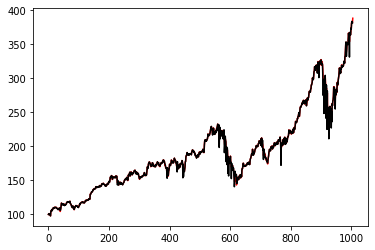

In [76]:
# report performance
rmse = sqrt(mean_squared_error(data_ar[int(len(data)*0.8)+1:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(data_ar[int(len(data)*0.8):],color='red')
pyplot.plot(predictions,color='black')
pyplot.show()

</br></br>

<h3>
4. Discuss and provide the results of predicting the values using different deep
learning structures.

</h3>

<h4>We tried MLP and LSTM in this project. And the result is listed here.</br></h4>
<h4>(1)MLP-RELU-(100,30)-constant (Model, Activation function, Layer structure, learning rate):</h4> RMSE: 25.321728163415667 </br>Validation Score: 0.8954990781414062</br>
<h4>(2)MLP-RELU-(10,3)-constant:</h4> RMSE 24.348808977585836 </br>Validation Score: 0.9033751389665521</br>
<h4>(3)MLP-tanh-(100,3)-constant:</h4> RMSE 29.638042594554406 </br>Validation Score: 0.856836445401433</br>
<h4>(4)MLP-RELU-(100,3)-adaptive:</h4> RMSE 25.321728163415667 </br>Validation Score: 0.8954990781414062</br>
<h4>LSTM:</h4>
    RMSE 5.433


<h4> First thing we notice here is MLP perform worse than LSTM. This is predicted because LSTM is more complex than MLP and it is well-known for being good at solving time series problem. The real interesting thing is MLP. You can see in case(1), we use RELU as the activiation function. The MLP has 100 hidden layers and each layer has 30 units. In case(2), we reduced the number of layers and units a lot, and the RMSE also reduced as a result! It turns out MLP will not always work better if we simply increase the number of layers and units. In case(3) we replace RELU with tanh and RMSE increases, which is also predicted because RELU performs better overall.(in most cases we test RELU first and then other activiation functions). Finally, we use 'adaptive' as learning rate and the result bascially stays the same. However the training speed increases significantly. With a good learning rate, we can learn fast in the begining to save time and learn slowly to avoid missing the convergence point. 
</h4>

<strong>reference:</strong> 

https://docs.google.com/spreadsheets/d/14tLHyRrUxpD2k3fdmsh6984l9W_VRhIDJU8I1GPmFls/edit?ts=5f03e786#gid=0 

https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775 
https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ 

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ 

https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/ 

https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

https://machinelearningmastery.com/time-series-data-stationary-python/ 
